In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import log
from sklearn import linear_model
from statsmodels.formula.api import ols
from numpy import exp

from mpl_toolkits.mplot3d import Axes3D

# Set some Pandas options
pd.set_option('max_columns', 30)
pd.set_option('max_rows', 20)

# Default Plotting Size
mpl.rc("figure", figsize=(8, 8))

# Store data in a consistent place
DATA_DIR = 'data/'

In [2]:
df = pd.read_csv(DATA_DIR + 'student-mat.csv')

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,...,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,...,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,...,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,...,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,...,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,...,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [4]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


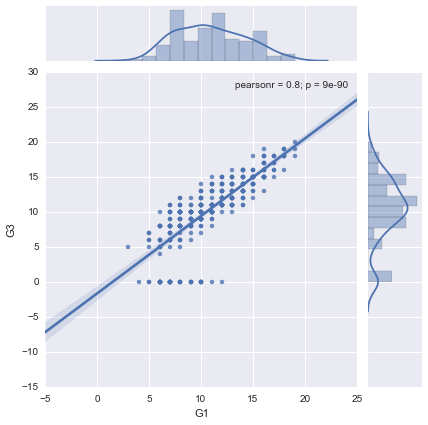

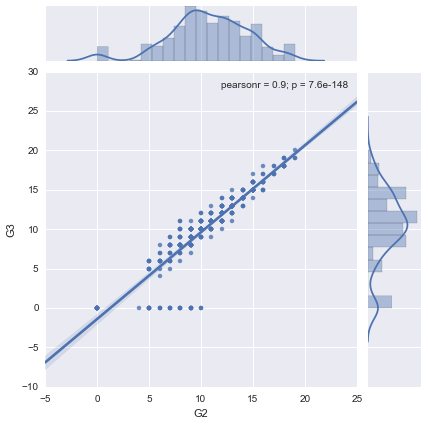

In [5]:
sns.jointplot(x="G1", y="G3", data=df, kind="reg");
sns.jointplot(x="G2", y="G3", data=df, kind="reg");

In [6]:
# Make the model object
regr = linear_model.LinearRegression()

In [7]:
# Fit the data
length = len(df['G3'].values)

g1 = [[x] for x in df['G1'].values]
g2 = [[x] for x in df['G2'].values]

predictors = [[df['G1'].values[i], df['G2'].values[i]] for i in range(length)]

g3 = df['G3'].values

In [8]:
regr.fit(predictors, g3)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [9]:
# Display the coefficients:
print regr.coef_

[ 0.15326859  0.98686684]


In [10]:
# Display our SSE:
print np.sum((regr.predict(predictors) - g3) ** 2)

1470.69385257


In [11]:
# Scoring our model (closer to 1 is better!)
print regr.score(predictors, g3)

0.822163233316


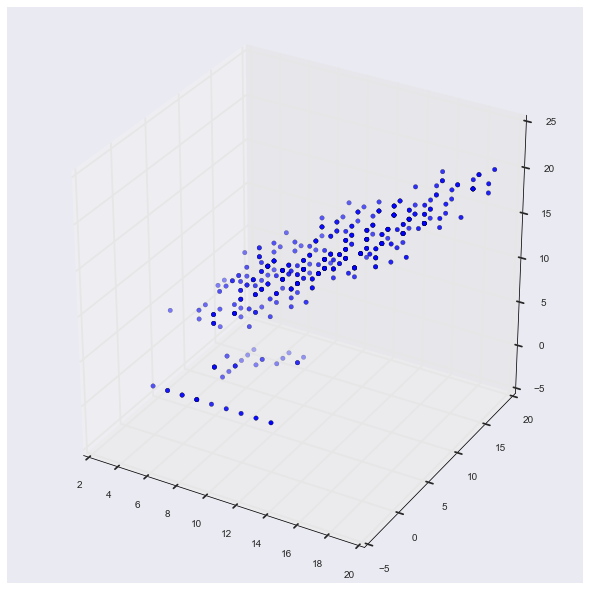

In [12]:
ax = Axes3D(plt.gcf())
ax.scatter(g1, g2, g3)

plt.show()

In [13]:
# The model can predict an answer
print regr.predict([18, 18])

18.6924254918


In [21]:
# sns.pairplot(df)